In [1]:
from keras.datasets import fashion_mnist
from tensorflow import keras
from keras import models 
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

In [2]:
(X, y), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(X.shape) 
print(y.shape)
print(X_test.shape) 
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
print(X.shape[0], 'train set')
print(X_test.shape[0], 'test set')

60000 train set
10000 test set


In [5]:
fashion_mnist_labels = ["T-shirt/top",  
                        "Trouser",      
                        "Pullover",     
                        "Dress",        
                        "Coat",         
                        "Sandal",       
                        "Shirt",        
                        "Sneaker",      
                        "Bag",          
                        "Ankle boot"]

In [6]:
img_index = 5

In [7]:
label_index = y[img_index]

In [8]:
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))

y = 2 Pullover


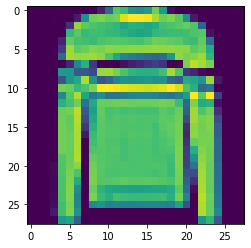

In [9]:
plt.imshow(X[img_index])

In [10]:
X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
(X, X_valid) = X[5000:], X[:5000]
(y, y_valid) = y[5000:], y[:5000]

In [12]:
w, h = 28, 28
X = X.reshape(X.shape[0], w, h, 1)
X_valid = X_valid.reshape(X_valid.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)

In [13]:
y = keras.utils.to_categorical(y, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [14]:
print("X shape:", X.shape, "y shape:", y.shape)
print(X.shape[0], 'train set')
print(X_valid.shape[0], 'validation set')
print(X_test.shape[0], 'test set')

X shape: (55000, 28, 28, 1) y shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [15]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten()) 
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               8

In [16]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [17]:
from keras.callbacks import ModelCheckpoint

In [18]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [19]:
model.fit(X,
         y,
         batch_size=64,
         epochs=10,
         validation_data=(X_valid, y_valid),
         callbacks=[checkpointer])

Epoch 1/10
859/860 [============================>.] - ETA: 0s - loss: 0.5615 - accuracy: 0.7950
Epoch 00001: val_loss improved from inf to 0.39180, saving model to model.weights.best.hdf5
860/860 [==============================] - 55s 64ms/step - loss: 0.5615 - accuracy: 0.7950 - val_loss: 0.3918 - val_accuracy: 0.8680
Epoch 2/10
859/860 [============================>.] - ETA: 0s - loss: 0.3990 - accuracy: 0.8544
Epoch 00002: val_loss improved from 0.39180 to 0.35688, saving model to model.weights.best.hdf5
860/860 [==============================] - 54s 63ms/step - loss: 0.3990 - accuracy: 0.8544 - val_loss: 0.3569 - val_accuracy: 0.8812
Epoch 3/10
859/860 [============================>.] - ETA: 0s - loss: 0.3648 - accuracy: 0.8682
Epoch 00003: val_loss improved from 0.35688 to 0.32084, saving model to model.weights.best.hdf5
860/860 [==============================] - 54s 63ms/step - loss: 0.3648 - accuracy: 0.8682 - val_loss: 0.3208 - val_accuracy: 0.8902
Epoch 4/10
859/860 [=========

In [21]:
model.load_weights('model.weights.best.hdf5')

In [22]:
score = model.evaluate(X_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8986999988555908


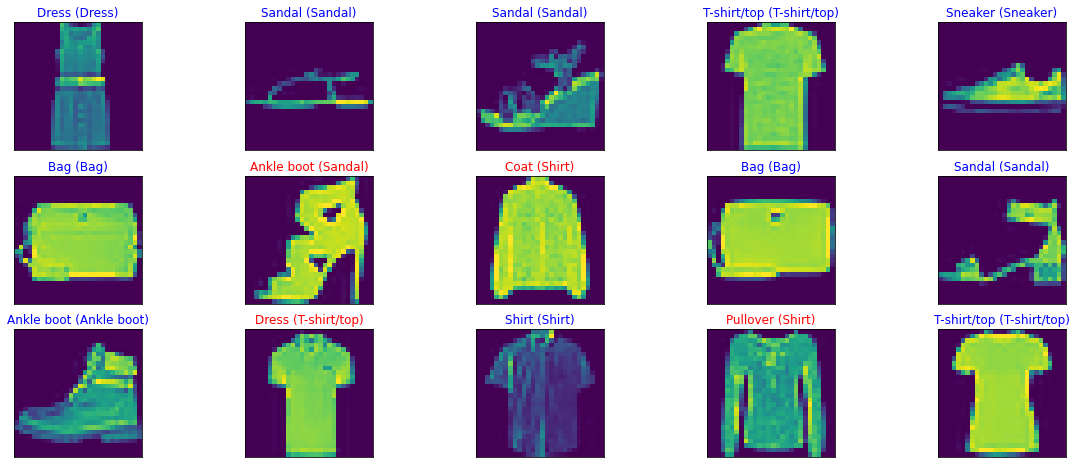

In [25]:
y_hat = model.predict(X_test)

figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, Xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("blue" if predict_index == true_index else "red"))